<a href="https://colab.research.google.com/github/kiran-bhandari16/LSTM-Stock-Price-Prediciton/blob/main/Sentiment_Analysis_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.metrics import plot_roc_curve
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import re
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Embedding, Dropout
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving economicalSentiments.csv to economicalSentiments.csv


In [ ]:
df=pd.read_csv('economicalSentiments.csv')

In [ ]:
df.head()

,Date,News Headline,Sentiment,Score
0,2018-06-1,Mustard oil to become dearer by Rs 15 per liter,Positive,0.4404
1,2018-06-1,Nepse slides further,Neutral,0.0000
2,2018-06-1,VAT on brokerage service charge scrapped,Neutral,0.0000
3,2018-06-1,"U.S. allies hit back at Washington's steel, al...",Neutral,0.0000
4,2018-06-1,Minister of State Baskota calls for proper gui...,Neutral,0.0000


In [ ]:
df.tail()

,Date,News Headline,Sentiment,Score
743,2018-07-31,Stocks close flat despite improved market acti...,Negative,-0.3724
744,2018-07-31,Taskforce finds organized crime in heli-rescue...,Negative,-0.8020
745,2018-07-31,Hearings committee puts off decision on Joshee,Neutral,0.0000
746,2018-07-31,Is delay in confirming CJ nominee a threat to ...,Negative,-0.6908
747,2018-07-31,Bilateral mechanism active to implement Nepal-...,Positive,0.4939


In [ ]:
# df.drop('Score', axis=1,inplace=True)
df.columns

Index(['Date', 'News Headline', 'Sentiment', ' Score'], dtype='object')

In [ ]:
df.value_counts()

Date        News Headline                                                         Sentiment   Score 
2018-07-10  Govt mulls allowing Nepal Army to revive Hetauda Textile Industry     Positive    0.3400    2
2018-06-17  Province 1 budget criticized for being tarai-centric                  Negative   -0.3612    2
2018-06-12  Retailers see sugar price going down                                  Neutral     0.0000    2
2018-06-2   Road mania grips local levels: Over half of budget for road projects  Neutral     0.0000    2
2018-06-6   RJPN mulling to walk out of Province 2 govt                           Neutral     0.0000    2
                                                                                                       ..
2018-06-28  Motion of public importance tabled in HoR                             Positive    0.3612    1
            Nepal pitches Tamakoshi V for AIIB financing                          Neutral     0.0000    1
            Nepse recovers slightly after two days 

In [ ]:
df.shape

(748, 4)

In [ ]:
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,Date,News Headline,Sentiment,Score
0,2018-07-30,Lawmakers demand action against Prasain,Negative,-0.1280
1,2018-06-20,Nepse sheds 9 points,Neutral,0.0000
2,2018-06-25,PLMC gives continuity to old ambitious programs,Positive,0.4767
3,2018-07-9,Budget is balanced in terms of federal structu...,Neutral,0.0000
4,2018-07-10,China chili fest gets off to scorching star,Neutral,0.0000


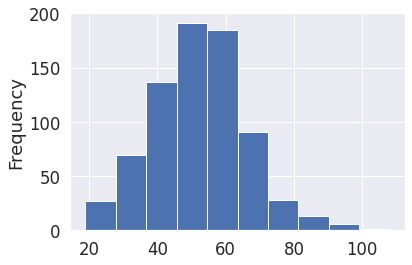

In [ ]:
# plotting the lenght of news headline
df["News Headline"].str.len().plot.hist()

In [ ]:
df["Sentiment"].value_counts()

Neutral     388
Positive    185
Negative    175
Name: Sentiment, dtype: int64

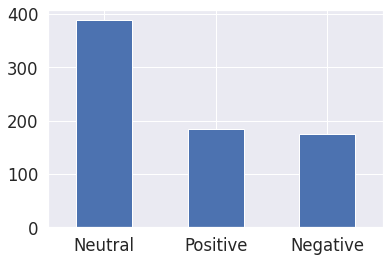

In [ ]:
df["Sentiment"].value_counts().plot.bar()
plt.xticks(rotation=0);

In [ ]:
# data preprocessing
# df["News Headline"].apply(lambda x: x.lower())
df["News Headline"] = df["News Headline"].apply(lambda x: re.sub('[^a-zA-z0-9\s]',"",x))
df['News Headline'].head()

0              Lawmakers demand action against Prasain
1                                 Nepse sheds 9 points
2      PLMC gives continuity to old ambitious programs
3    Budget is balanced in terms of federal structu...
4          China chili fest gets off to scorching star
Name: News Headline, dtype: object

In [ ]:
df.head()

,Date,News Headline,Sentiment,Score
0,2018-07-30,Lawmakers demand action against Prasain,Negative,-0.1280
1,2018-06-20,Nepse sheds 9 points,Neutral,0.0000
2,2018-06-25,PLMC gives continuity to old ambitious programs,Positive,0.4767
3,2018-07-9,Budget is balanced in terms of federal structu...,Neutral,0.0000
4,2018-07-10,China chili fest gets off to scorching star,Neutral,0.0000


In [ ]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(df["News Headline"].values)

X=tokenizer.texts_to_sequences(df["News Headline"].values)
X=pad_sequences(X)
X[:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90, 226,
        321,  32, 868],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
        869, 870, 227],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 871, 168, 872,   1,
        873, 874, 228],
       [  0,   0,   0,   0,   0,  18,  50, 875,   2, 229,   3,  91, 513,
         12,  15, 230],
       [  0,   0,   0,   0,   0,   0,   0,   0,  16, 876, 877, 231,  51,
          1, 878, 514],
       [  0,   0,   0,   0,   0,   0,   0,   0,  33, 169,   5, 232, 515,
        233,  24,  52],
       [  0,   0,   0,   0,   0,   0,   0,  57,   8, 879,   1, 516, 517,
        518, 519, 322],
       [  0,   0,   0,   0,   0,   0, 880, 881,  20, 882,   1, 883, 323,
          8,  15,  34],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 884,   3,  58,
         92,  41, 885],
       [  0,   0,   0,   0,   0,   0,   0, 886, 324,   2,  93, 325,  18,
         94, 887,   6]], dtype=int32)

In [ ]:
X.shape

(748, 16)

In [ ]:
model=Sequential()
model.add(Embedding(5000,256,input_length=X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True,dropout=0.2,recurrent_dropout=0.1))
model.add(LSTM(256, dropout=0.2,recurrent_dropout=0.1))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 16, 256)           1280000   
                                                                 
 dropout_5 (Dropout)         (None, 16, 256)           0         
                                                                 
 lstm_10 (LSTM)              (None, 16, 256)           525312    
                                                                 
 lstm_11 (LSTM)              (None, 256)               525312    
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y=pd.get_dummies(df["Sentiment"]).values
[print(df["Sentiment"][i],y[i]) for i in range(0,7)]


Negative [1 0 0]
Neutral [0 1 0]
Positive [0 0 1]
Neutral [0 1 0]
Neutral [0 1 0]
Negative [1 0 0]
Neutral [0 1 0]


[None, None, None, None, None, None, None]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
batch_size=64
epochs=10
model.fit(X_train,y_train, epochs=epochs,batch_size=batch_size,verbose=2)

Epoch 1/10
10/10 - 10s - loss: 1.0343 - accuracy: 0.5351 - 10s/epoch - 957ms/step
Epoch 2/10
10/10 - 4s - loss: 1.0154 - accuracy: 0.5334 - 4s/epoch - 391ms/step
Epoch 3/10
10/10 - 4s - loss: 0.9625 - accuracy: 0.5334 - 4s/epoch - 389ms/step
Epoch 4/10
10/10 - 4s - loss: 0.8084 - accuracy: 0.6003 - 4s/epoch - 385ms/step
Epoch 5/10
10/10 - 4s - loss: 0.4385 - accuracy: 0.8562 - 4s/epoch - 390ms/step
Epoch 6/10
10/10 - 6s - loss: 0.1552 - accuracy: 0.9548 - 6s/epoch - 574ms/step
Epoch 7/10
10/10 - 4s - loss: 0.1480 - accuracy: 0.9599 - 4s/epoch - 385ms/step
Epoch 8/10
10/10 - 4s - loss: 0.0616 - accuracy: 0.9900 - 4s/epoch - 385ms/step
Epoch 9/10
10/10 - 4s - loss: 0.0083 - accuracy: 1.0000 - 4s/epoch - 384ms/step
Epoch 10/10
10/10 - 4s - loss: 0.0034 - accuracy: 1.0000 - 4s/epoch - 382ms/step


In [ ]:
predictions=model.predict(X_test)

In [ ]:
# predictions

In [ ]:
[print(df['News Headline'][i], predictions[i], y_test[i]) for i in range(0,10)]

Lawmakers demand action against Prasain [0.9465001  0.01838673 0.03511316] [1 0 0]
Nepse sheds 9 points [0.00703601 0.97092193 0.02204212] [0 1 0]
PLMC gives continuity to old ambitious programs [0.00452025 0.79322135 0.20225844] [0 0 1]
Budget is balanced in terms of federal structure Minister Dr Khatiwada [0.05713821 0.8643325  0.07852928] [0 1 0]
China chili fest gets off to scorching star [1.4458656e-03 4.8907287e-04 9.9806505e-01] [1 0 0]
House rule on MPs suspension challenged at SC [0.7540414  0.05984236 0.18611623] [1 0 0]
Trade with Tibet to remain open even during monsoon [9.9246675e-01 2.6814060e-04 7.2651245e-03] [1 0 0]
Sincerity seen as key to implementing deal with Dr KC [1.4173092e-04 9.9882728e-01 1.0309811e-03] [0 0 1]
Term of all NA members determined [4.7436450e-04 1.3251799e-03 9.9820042e-01] [0 0 1]
Bleak progress in spending dev budget despite stable govt [0.00133117 0.9828818  0.01578709] [0 0 1]


[None, None, None, None, None, None, None, None, None, None]

In [ ]:
df["News Headline"]=tokenizer.texts_to_sequences(df["News Headline"].values)
df["News Headline"]

0                                [90, 226, 321, 32, 868]
1                                    [11, 869, 870, 227]
2                      [871, 168, 872, 1, 873, 874, 228]
3         [18, 50, 875, 2, 229, 3, 91, 513, 12, 15, 230]
4                   [16, 876, 877, 231, 51, 1, 878, 514]
                             ...                        
743                [241, 226, 463, 278, 744, 2356, 2357]
744       [11, 264, 28, 2358, 99, 243, 1, 173, 2359, 86]
745    [288, 319, 2360, 320, 42, 2361, 17, 22, 2362, ...
746          [2363, 56, 41, 316, 1, 794, 329, 4, 9, 134]
747           [398, 399, 498, 371, 161, 4, 78, 675, 676]
Name: News Headline, Length: 748, dtype: object

In [ ]:
df["News Headline"].shape

(748,)

In [ ]:
df.head(10)

,Date,News Headline,Sentiment,Score
0,2018-07-30,"[90, 226, 321, 32, 868]",Negative,-0.1280
1,2018-06-20,"[11, 869, 870, 227]",Neutral,0.0000
2,2018-06-25,"[871, 168, 872, 1, 873, 874, 228]",Positive,0.4767
3,2018-07-9,"[18, 50, 875, 2, 229, 3, 91, 513, 12, 15, 230]",Neutral,0.0000
4,2018-07-10,"[16, 876, 877, 231, 51, 1, 878, 514]",Neutral,0.0000
5,2018-07-16,"[33, 169, 5, 232, 515, 233, 24, 52]",Negative,-0.1027
6,2018-06-12,"[57, 8, 879, 1, 516, 517, 518, 519, 322]",Neutral,0.0000
7,2018-07-28,"[880, 881, 20, 882, 1, 883, 323, 8, 15, 34]",Neutral,0.0000
8,2018-06-18,"[884, 3, 58, 92, 41, 885]",Positive,0.3400
9,2018-06-17,"[886, 324, 2, 93, 325, 18, 94, 887, 6]",Positive,0.2292


In [ ]:
df['Sentiment'][:10]

0    Negative
1     Neutral
2    Positive
3     Neutral
4     Neutral
5    Negative
6     Neutral
7     Neutral
8    Positive
9    Positive
Name: Sentiment, dtype: object

In [ ]:
m=pd.get_dummies(df["Sentiment"]).values

In [ ]:
[print(df["Sentiment"][i],m[i]) for i in range(0,7)]

Negative [1 0 0]
Neutral [0 1 0]
Positive [0 0 1]
Neutral [0 1 0]
Neutral [0 1 0]
Negative [1 0 0]
Neutral [0 1 0]


[None, None, None, None, None, None, None]

In [ ]:
df['Sentiment']=pd.get_dummies(df["Sentiment"]).values

In [ ]:
df["Sentiment"][:10]

0    1
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: Sentiment, dtype: uint8

In [ ]:
df.to_csv("economical-news-sentiment.csv", index=False)